In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# 📁 Dataset

In [7]:
df=pd.read_csv(r"C:\Users\hp\Downloads\sales.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Data Visualization 📊📈📉

<Axes: >

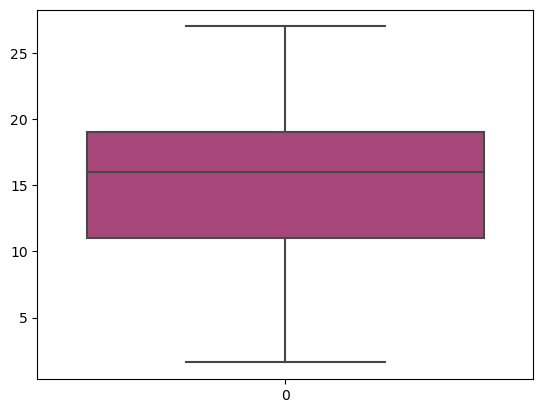

In [41]:
sns.boxplot(df['Sales'],palette="magma")

<Axes: >

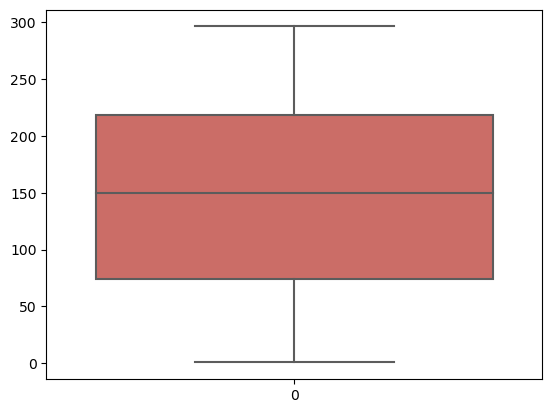

In [47]:
sns.boxplot(df['TV'],palette="hls")

<Axes: >

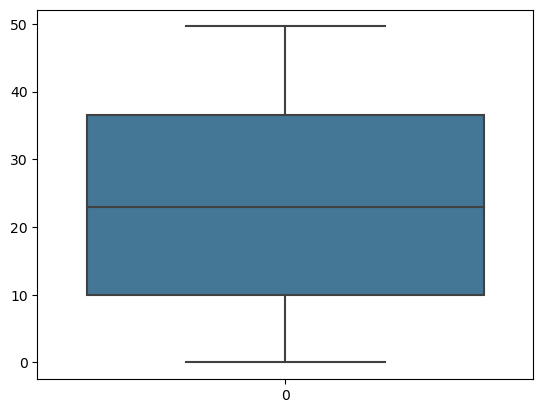

In [53]:
sns.boxplot(df['Radio'],palette="mako")

<Axes: >

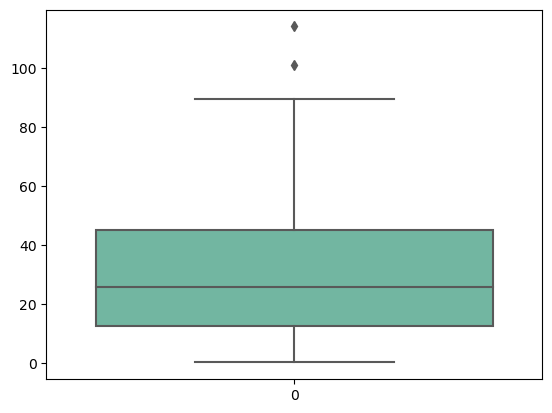

In [52]:
sns.boxplot(df['Newspaper'],palette="Set2")

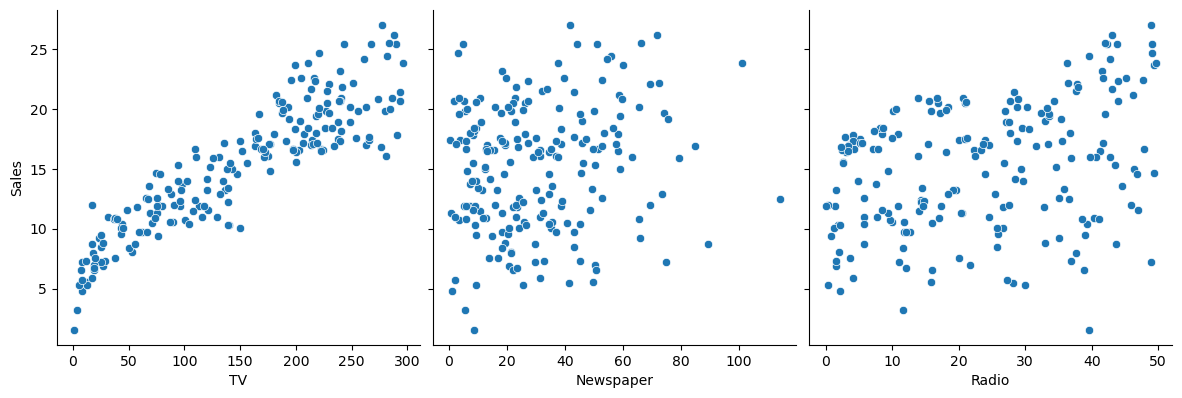

In [24]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')


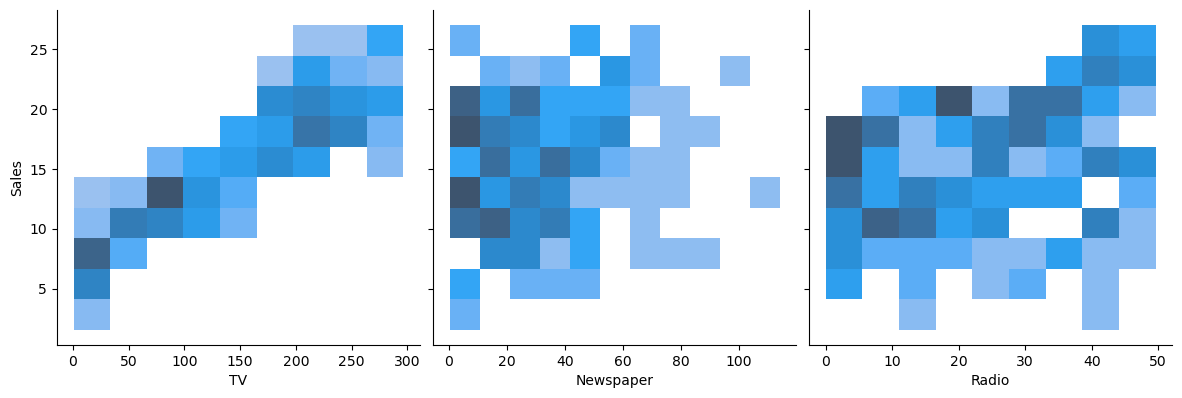

In [20]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='hist',palette="magma")


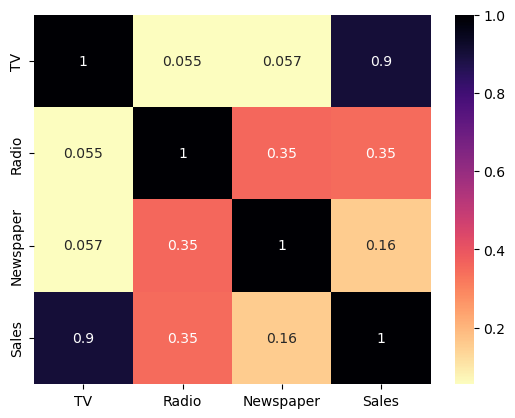

In [34]:
sns.heatmap(df.corr(), cmap="magma_r", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, money spend on advertising on TV seems to be most correlated with Sales.Followed by Radio then Newspaper.

<Axes: >

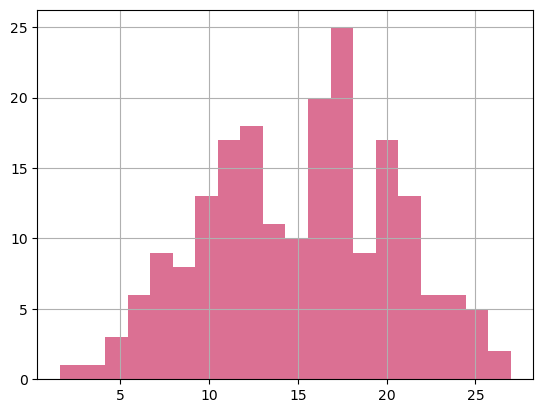

In [33]:
df.Sales.hist(bins=20 , color="palevioletred")

# 🛠️ Feature Engineering 

In [59]:
df_train,df_test=train_test_split(df,test_size=0.2)

In [94]:
#change index of test dataframe to start from 0 
df_test.index=np.arange(0,len(df_test))

In [95]:
x_train=df_train.drop('Sales',axis=1)
y_train=df_train['Sales']
x_test=df_test.drop('Sales',axis=1)
y_test=df_test['Sales']

# 📈 Linear Regression

In [86]:
linear_R = LinearRegression()
linear_R.fit(x_train, y_train)
LR_pred = linear_R.predict(x_test)

In [87]:
mae = mean_absolute_error(y_test,LR_pred)
mse = mean_squared_error(y_test,LR_pred)
rmse = np.sqrt(mean_squared_error(y_test,LR_pred))
r_squared = r2_score(y_test,LR_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 1.3727083409767729
MSE: 2.903404537861314
RMSE: 1.7039379501206355
R2 Score: 0.8751062365704247


In [98]:
print(df_test.loc[3])
print(LR_pred[3])

TV           136.2
Radio         19.2
Newspaper     16.6
Sales         13.2
Name: 3, dtype: float64
14.068915633453987


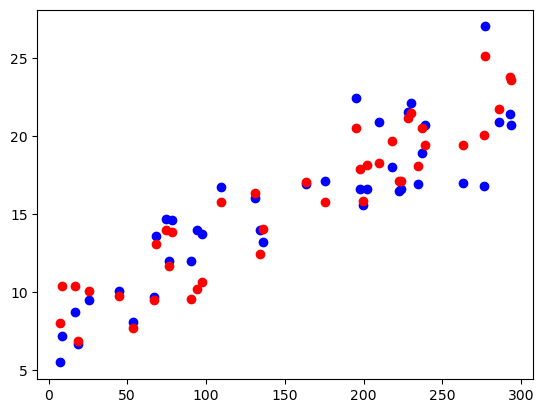

In [105]:
plt.scatter(df_test['TV'],y_test , color='b')
plt.scatter(df_test['TV'],LR_pred , color='r')
plt.show()

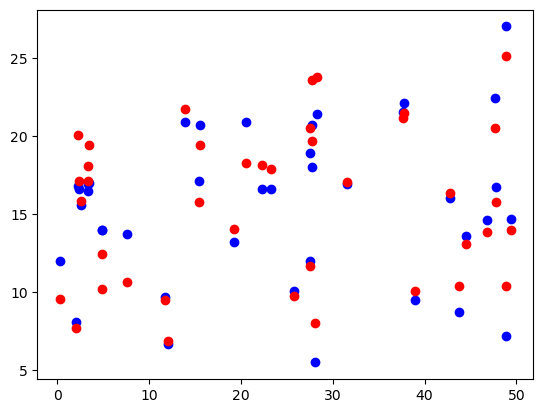

In [106]:
plt.scatter(df_test['Radio'],y_test , color='b')
plt.scatter(df_test['Radio'],LR_pred , color='r')
plt.show()

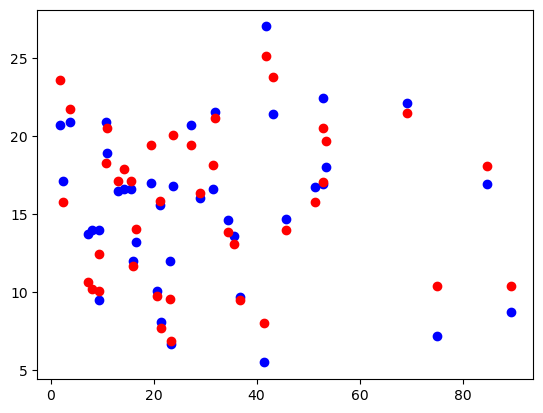

In [107]:
plt.scatter(df_test['Newspaper'],y_test , color='b')
plt.scatter(df_test['Newspaper'],LR_pred , color='r')
plt.show()